# Assignment 4: Fisher Implementation

<font color=blue><b>1- Import Needed Packages</b></font>

In [211]:
import numpy as np
import os
import imageio
import matplotlib.pylab as plt
from sklearn.metrics import confusion_matrix

### Get the current directory path

In [3]:
home_path = os.getcwd()
home_path

"D:\\Not yours\\NU\\Master's\\Intro to machine learning ans statistical analysis\\Assignment 4\\Assignment 4 Fisher"

<font color=blue><b>2- Load Images </b></font>

In [9]:
path="D:\\Not yours\\NU\\Master's\\Intro to machine learning ans statistical analysis\\Assignment 4\\Assignment 4 Fisher\\Train"
os.chdir(path)

Images=os.listdir()



In [10]:
print(type(Images))# How Does it store

<class 'list'>


In [11]:
print(len(Images)) # To know number of them

2401


In [12]:
print(Images)

['1.jpg', '10.jpg', '100.jpg', '1000.jpg', '1001.jpg', '1002.jpg', '1003.jpg', '1004.jpg', '1005.jpg', '1006.jpg', '1007.jpg', '1008.jpg', '1009.jpg', '101.jpg', '1010.jpg', '1011.jpg', '1012.jpg', '1013.jpg', '1014.jpg', '1015.jpg', '1016.jpg', '1017.jpg', '1018.jpg', '1019.jpg', '102.jpg', '1020.jpg', '1021.jpg', '1022.jpg', '1023.jpg', '1024.jpg', '1025.jpg', '1026.jpg', '1027.jpg', '1028.jpg', '1029.jpg', '103.jpg', '1030.jpg', '1031.jpg', '1032.jpg', '1033.jpg', '1034.jpg', '1035.jpg', '1036.jpg', '1037.jpg', '1038.jpg', '1039.jpg', '104.jpg', '1040.jpg', '1041.jpg', '1042.jpg', '1043.jpg', '1044.jpg', '1045.jpg', '1046.jpg', '1047.jpg', '1048.jpg', '1049.jpg', '105.jpg', '1050.jpg', '1051.jpg', '1052.jpg', '1053.jpg', '1054.jpg', '1055.jpg', '1056.jpg', '1057.jpg', '1058.jpg', '1059.jpg', '106.jpg', '1060.jpg', '1061.jpg', '1062.jpg', '1063.jpg', '1064.jpg', '1065.jpg', '1066.jpg', '1067.jpg', '1068.jpg', '1069.jpg', '107.jpg', '1070.jpg', '1071.jpg', '1072.jpg', '1073.jpg', '107

In [13]:
train_labels=Images.pop()
train_labels=np.loadtxt(train_labels)
print(train_labels)
print(len(Images))

[0. 0. 0. ... 9. 9. 9.]
2400


<font color=blue><b>3-Sort them and read them </b></font>

In [14]:
%matplotlib inline
Images1=sorted(Images, key=lambda t: int(os.path.splitext(t)[0])) # sort them ascendingly 
ImagF=np.zeros((2400,784))  # All Images
for i in range(len(Images1)):
    ImagF1=imageio.imread(Images1[i])
    ImagF[i,:]=ImagF1.reshape((1,784))


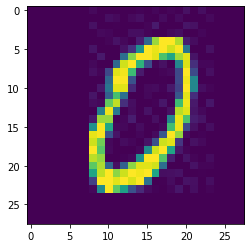

In [44]:
plt.imshow(ImagF[239,:].reshape(28,28))

<font color=blue ><b>4-Training Phase (Weights) </b></font> 

In [124]:
def m1(c1):
    #Calculate mean of the intended class 
#     C_sliced = ImagF[c1*240:(c1+1)*240,:]
    C_sumed = c1.sum(axis = 0)
    m1 = C_sumed / 240
    return m1
def m2(c2):
    #Calculate mean of the other classes
#     C_sliced = np.delete(ImagF, slice(c2*240, (c2+1)*240), axis=0)
    C_sumed = c2.sum(axis = 0)
    m2 = C_sumed / 2160
    return m2

In [203]:
def S1(c1,m1):
    # Calculate First Term of SW
#     C_sliced = ImagF[c1*240:(c1+1)*240,:]
    m1_tiled = np.tile(m1, (240, 1))
    diff = c1 - m1_tiled
#     S1_t = diff
    final = np.zeros((784,784))
    for i in range(len(diff)):
        final = final + np.dot(diff[i].reshape(-1,1), diff[i].reshape(-1,1).T)
    S1_t = final
#     S1_t = np.matmul(diff, np.transpose(diff))
    return S1_t 
def S2(c2,m2):
    #Calculate Second Term of SW
#     C_sliced = np.delete(ImagF, slice(c2*240, (c2+1)*240), axis=0)
    m1_tiled = np.tile(m2, (2160, 1))
    diff = c2 - m1_tiled
    final = np.zeros((784,784))
    for i in range(len(diff)):
        final = final + np.dot(diff[i].reshape(-1,1), diff[i].reshape(-1,1).T)
    S2_t = final
    return S2_t

In [204]:
# W=np.zeros((10,784))
# W_o=np.zeros((10,1))
counter=0 
for i in range(0,len(Images1),240):
    
    #Get First Class say c1
    c1 = ImagF[i:(i+240),:]
    #Get Other Classes say c2
    c2 = np.delete(ImagF, slice(i, i+240), axis=0)
    #Get Means
    mean1=m1(c1)
    mean2=m2(c2)
    
    #Calculate SW
    Sw=S1(c1,mean1)+S2(c2,mean2)
    #Calculate its invers "Note Use pinv function"
    Sw_inv=np.linalg.pinv(Sw)
    #Calculate Weigths of the intended class 
    if i ==0:
        W = np.matmul(Sw_inv, mean1-mean2)
        W_o = np.array(-1*np.matmul((W.T),(mean1+mean2)/2))
    else:
        W_for_class = np.matmul(Sw_inv, mean1-mean2)
        W= np.vstack((W, W_for_class))
        W_o_for_class = -1*np.matmul((W_for_class.T),(mean1+mean2)/2)
        W_o = np.append(W_o, W_o_for_class)
    #Calculate W_bias of it
    
    counter+=1


<font color=blue ><b>5-Testing Phase </b></font>

In [219]:
#-----------------Testing---------------
os.chdir(home_path)
Test_Labels=np.loadtxt("D:\\Not yours\\NU\\Master's\\Intro to machine learning ans statistical analysis\\Assignment 4\\Assignment 4 Fisher\\Test\\Test Labels.txt")
path="D:\\Not yours\\NU\\Master's\\Intro to machine learning ans statistical analysis\\Assignment 4\\Assignment 4 Fisher\\Test"
os.chdir(path)
Test_Image=os.listdir()
Test_Image.pop()
Test_Image1=sorted(Test_Image, key=lambda t: int(os.path.splitext(t)[0]))
Imag_T=np.zeros((200,784))
for i in range(len(Test_Image1)):
    Imag=imageio.imread(Test_Image1[i])
    Imag_T[i,:]=Imag.reshape((1,784)) 
    
# Calculate Predicted Y 
predicted_Y = np.matmul(W, Imag_T.T).T + np.tile(W_o, (200, 1))
# Calculate Predicted Labels
Predicted_Labels = predicted_Y.argmax(axis = 1)

#Calculate Accuracy and Print it
True_predicted = np.sum(Test_Labels == Predicted_Labels)
Accuracy = True_predicted / 200
print("The accuracy is: {}".format(Accuracy))
#Plot Confusion Matrix and save it but take care to save it in another folder NOT TRAIN or TEST
confusion_matrix(Test_Labels, Predicted_Labels)

The accuracy is: 0.83


array([[19,  0,  0,  0,  0,  1,  0,  0,  0,  0],
       [ 0, 20,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 1,  0, 16,  1,  1,  0,  0,  1,  0,  0],
       [ 0,  1,  1, 17,  0,  1,  0,  0,  0,  0],
       [ 1,  0,  1,  0, 14,  0,  0,  0,  1,  3],
       [ 0,  0,  0,  2,  0, 15,  0,  0,  1,  2],
       [ 0,  0,  1,  0,  0,  0, 19,  0,  0,  0],
       [ 0,  0,  0,  0,  2,  0,  0, 17,  0,  1],
       [ 1,  0,  0,  1,  2,  1,  0,  0, 12,  3],
       [ 0,  0,  0,  0,  0,  0,  0,  3,  0, 17]], dtype=int64)

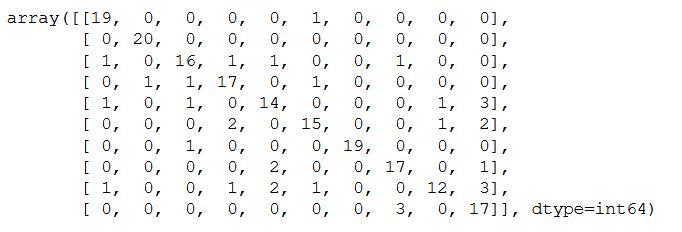

In [221]:
from IPython.display import Image
Image(filename="D:\\Not yours\\NU\\Master's\\Intro to machine learning ans statistical analysis\\Assignment 4\\Confusion matrix.JPG")